In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [2]:
imagepaths = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

681


In [3]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('/kaggle/input/pothole-detection-dataset/normal/')):
            y.append('NEGATIVE')
        else:
            y.append('POSITIVE')
    except:
        pass

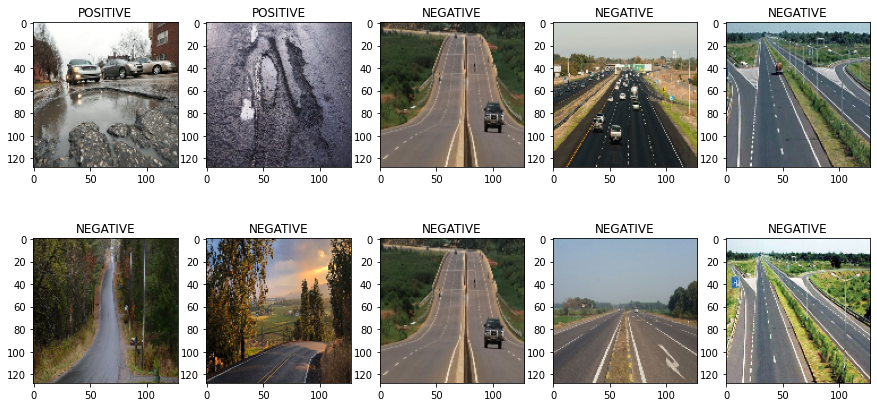

In [4]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [6]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [8]:
history = model.fit(x_train, y_train, epochs=50, batch_size=12, verbose=2, validation_data=(x_test, y_test))

Epoch 1/50
43/43 - 7s - loss: 2.1621 - accuracy: 0.6059 - val_loss: 0.4479 - val_accuracy: 0.8353
Epoch 2/50
43/43 - 6s - loss: 0.4870 - accuracy: 0.7608 - val_loss: 0.3166 - val_accuracy: 0.8765
Epoch 3/50
43/43 - 7s - loss: 0.4754 - accuracy: 0.8039 - val_loss: 0.7951 - val_accuracy: 0.5471
Epoch 4/50
43/43 - 7s - loss: 0.5835 - accuracy: 0.6863 - val_loss: 2.4464 - val_accuracy: 0.4941
Epoch 5/50
43/43 - 6s - loss: 0.6185 - accuracy: 0.6980 - val_loss: 0.5729 - val_accuracy: 0.7118
Epoch 6/50
43/43 - 6s - loss: 0.4342 - accuracy: 0.8157 - val_loss: 0.3619 - val_accuracy: 0.8529
Epoch 7/50
43/43 - 7s - loss: 0.3446 - accuracy: 0.8627 - val_loss: 0.3476 - val_accuracy: 0.8412
Epoch 8/50
43/43 - 6s - loss: 0.3310 - accuracy: 0.8745 - val_loss: 0.3475 - val_accuracy: 0.8529
Epoch 9/50
43/43 - 6s - loss: 0.3472 - accuracy: 0.8529 - val_loss: 0.3524 - val_accuracy: 0.8235
Epoch 10/50
43/43 - 6s - loss: 0.3144 - accuracy: 0.8529 - val_loss: 0.3023 - val_accuracy: 0.8706
Epoch 11/50
43/43 -

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy*100))

6/6 [==============================] - 1s 82ms/step - loss: 0.5009 - accuracy: 0.8765
Test accuracy: 87.65%


In [10]:
prediction = model.predict(x_test)

In [11]:
y_pred = np.argmax(prediction, axis=1)

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

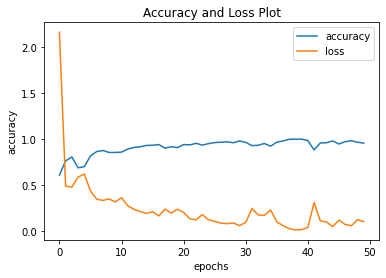

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Accuracy and Loss Plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','loss'], loc='upper right')
plt.show()

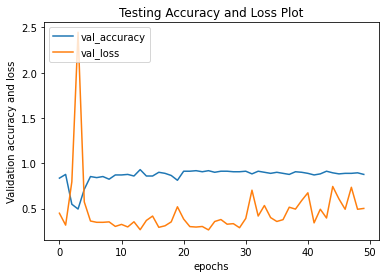

In [14]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Testing Accuracy and Loss Plot')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy and loss')
plt.legend(['val_accuracy','val_loss'], loc='upper left')
plt.show()

In [15]:
#testing the model for confusion matrix
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)

In [16]:
pd.DataFrame(confusion_matrix(y_test2, y_pred),
             columns=["Predicted NEGATIVE", "Predicted POSITIVE"],
             index=["Actual NEGATIVE", "Actual POSITIVE"])

,Predicted NEGATIVE,Predicted POSITIVE
Actual NEGATIVE,70,12
Actual POSITIVE,9,79


In [40]:
x_train.shape

(510, 128, 128, 3)

In [48]:
n_samples = x_train.shape[0]
x_train_flat = x_train.reshape(n_samples, -1)
n_samples = x_test.shape[0]
x_test_flat = x_test.reshape(n_samples, -1)


from sklearn.ensemble import RandomForestClassifier  
classifier2= RandomForestClassifier(n_estimators=50, criterion="entropy")  
classifier2.fit(x_train_flat, y_train)  
#Predicting the test set result  
y_pred= classifier2.predict(x_test_flat) 
from sklearn.metrics import accuracy_score, classification_report
print('Random Forest Classifier Results')
ans = accuracy_score(y_test, y_pred)
ans3 = round(ans*100,3)
print('Acurracy score of Random Forest Classifier Model is {ans}'.format(ans=ans3))
print(classification_report(y_test, y_pred))#classification report for RandomForestClassifier model prediction

Random Forest Classifier Results
Acurracy score of Random Forest Classifier Model is 76.471
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        82
           1       0.77      0.77      0.77        88

   micro avg       0.77      0.76      0.77       170
   macro avg       0.77      0.76      0.77       170
weighted avg       0.77      0.76      0.77       170
 samples avg       0.76      0.76      0.76       170



**Support Vector Machine**

In [50]:
y_train = y_train[:, 0]  # get the first column of y_train
y_test = y_test[:, 0]    # get the first column of y_test


from sklearn import svm 
classifier2= svm.LinearSVC()  
classifier2.fit(x_train_flat, y_train)  
#Predicting the test set result  
y_pred= classifier2.predict(x_test_flat) 
from sklearn.metrics import accuracy_score, classification_report
print('Support Vector Machines Results')
ans = accuracy_score(y_test, y_pred)
ans3 = round(ans*100,3)
print('Accuracy of Support Vector Machine Model Results is {ans}'.format(ans=ans3))
print(classification_report(y_test, y_pred))#classification report for RandomForestClassifier model prediction

Support Vector Machines Results
Accuracy of Support Vector Machine Model Results is 75.294
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75        88
         1.0       0.72      0.79      0.76        82

    accuracy                           0.75       170
   macro avg       0.75      0.75      0.75       170
weighted avg       0.76      0.75      0.75       170



**KNeighborsClassifier**

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
classifier4= KNeighborsClassifier(n_neighbors=2)
classifier4.fit(x_train_flat, y_train)  
#Predicting the test set result  
y_pred= classifier4.predict(x_test_flat) 
from sklearn.metrics import accuracy_score, classification_report
print('Support Vector Machines Results')
ans = accuracy_score(y_test, y_pred)
ans3 = round(ans*100,3)
print('Accuracy of Support Vector Machine Model Results is {ans}'.format(ans=ans3))
print(classification_report(y_test, y_pred))#classification report for RandomForestClassifier model prediction

Support Vector Machines Results
Accuracy of Support Vector Machine Model Results is 64.118
              precision    recall  f1-score   support

         0.0       0.62      0.82      0.70        88
         1.0       0.70      0.45      0.55        82

    accuracy                           0.64       170
   macro avg       0.66      0.63      0.63       170
weighted avg       0.66      0.64      0.63       170

